## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [2]:
mall = pd.read_csv("mall-customers.csv")

## EDA (Exploratory Data Analysis)

In [3]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Feature Engineering

In [5]:
FEMall = mall.iloc[:,[-2,-1]]

### Feature Scaling

In [6]:
# from sklearn.preprocessing import StandardScaler

In [7]:
# model = StandardScaler()

In [8]:
# d1 = model.fit_transform(FEMall[["Annual Income (k$)"]]).flatten()

In [9]:
# d2 = model.fit_transform(FEMall[["Spending Score (1-100)"]]).flatten()

### Data Vis

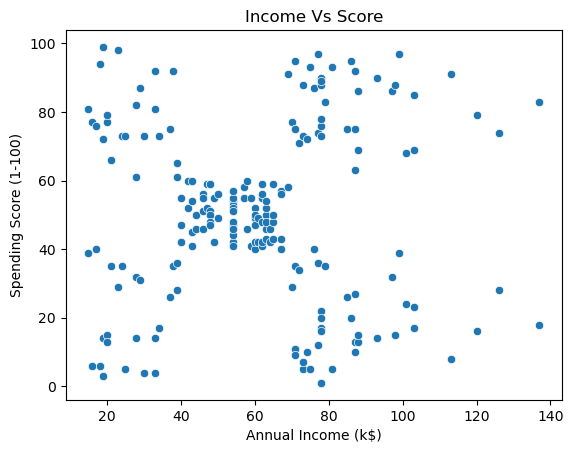

In [10]:
plt.title("Income Vs Score")
sns.scatterplot(data=FEMall,x=FEMall["Annual Income (k$)"],y=FEMall["Spending Score (1-100)"])
plt.show()

In [11]:
# after feature scaling
# plt.title("After Feature Scaling\nIncome Vs Score")
# plt.xlabel("Annual Income (k$)")
# plt.ylabel("Spending Score (1-100)")
# sns.scatterplot(x=d1,y=d2)
# plt.show()

## Model selection

In [12]:
from sklearn.cluster import KMeans

## Finding Optimal K

In [13]:
X = FEMall.values

In [14]:
def wcss(X):
    """
                ----Elbow Method----
        X => data
    """
    wcss = []
    for i in range(1,11):
        kmean = KMeans(random_state=42,init='k-means++',n_clusters=i)
        kmean.fit(X)
        wcss.append(kmean.inertia_)
    return wcss       

In [15]:
print(wcss(X))

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 21850.165282585633, 19672.07284901432]


C:\Users\Ali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


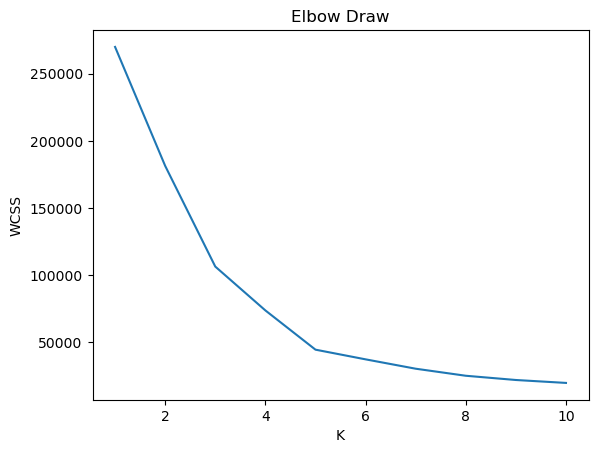

In [16]:
plt.title("Elbow Draw")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.plot(range(1,11),wcss(X))
plt.show()

## Model Training  

In [17]:
kmeans = KMeans(random_state=42,init='k-means++',n_clusters=5)

In [18]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [19]:
kmeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## Model Prediction

In [20]:
yPredict = kmeans.fit_predict(X)
yPredict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [21]:
mallClustered = mall.copy()

In [22]:
mallClustered["Clusters"] = yPredict

In [23]:
mallClustered.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


## Clusters Vis

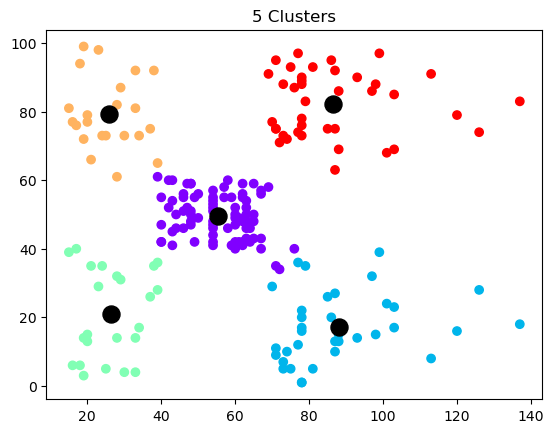

In [24]:
plt.title("5 Clusters")
plt.scatter(X[:,0],X[:,1],c=mallClustered["Clusters"],cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black",s=150)
plt.show()

# Thanks🥰